![titanic](titanic.jpg)

In [48]:
# 라이브러리 호출
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

In [49]:
# 데이터 로드
train_data = pd.read_csv("./data/train.csv")
test_data = pd.read_csv("./data/test.csv")

In [50]:
# 상위 5개 데이터 확인
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [51]:
# 불필요한 열 삭제
train_data.drop(["PassengerId", "Ticket", "Cabin"], axis = 1, inplace = True)
test_data.drop(["PassengerId", "Ticket", "Cabin"], axis = 1, inplace = True)

In [52]:
# 상위 5개 데이터 확인
train_data.head(5)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S


In [53]:
# 데이터 결측치 확인
train_data.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

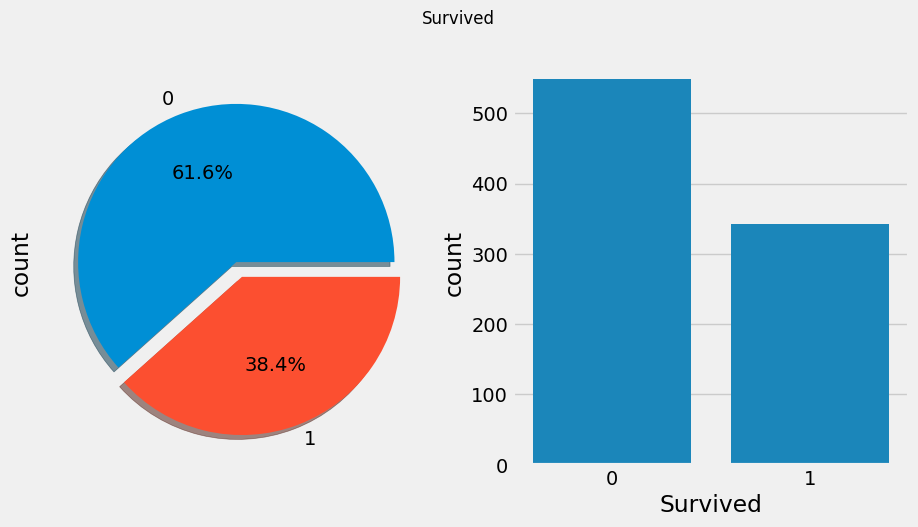

In [54]:
# 타겟 컬럼 (생존율) 확인
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

train_data["Survived"].value_counts().plot.pie(explode =[0, 0.1], autopct = "%1.1f%%", ax = axes[0], shadow = True)

sns.countplot(x = "Survived", data = train_data, ax = axes[1])

plt.rc("font", size=10)
plt.rc("axes", labelsize = 10)
fig.suptitle("Survived")
plt.show()

- 38.4%의 승객들이 생존하였으며, 대부분의 승객들은 사망하였음

In [55]:
# 컬럼별 데이터 타입 확인
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- 순서형: Pclass
- 범주형: Sex, Embarked
- 연속형: Age, Fare

In [56]:
# Pclass와 생존 분석
pd.crosstab(train_data.Pclass, train_data.Survived, margins = True).style.background_gradient(cmap = "summer_r")

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


- 1등석의 승객이 가장 많이 생존하였다.
- 생존자 수는 2등석보다 3등석의 승객이 많지만 비율로 따져본다면 2등석의 승객들이 생존할 확률이 높다.
- 3등석의 승객이 가장 많이 사망하였다.
- 객실 등급과 생존 여부는 상관관계가 있는 것으로 보인다.

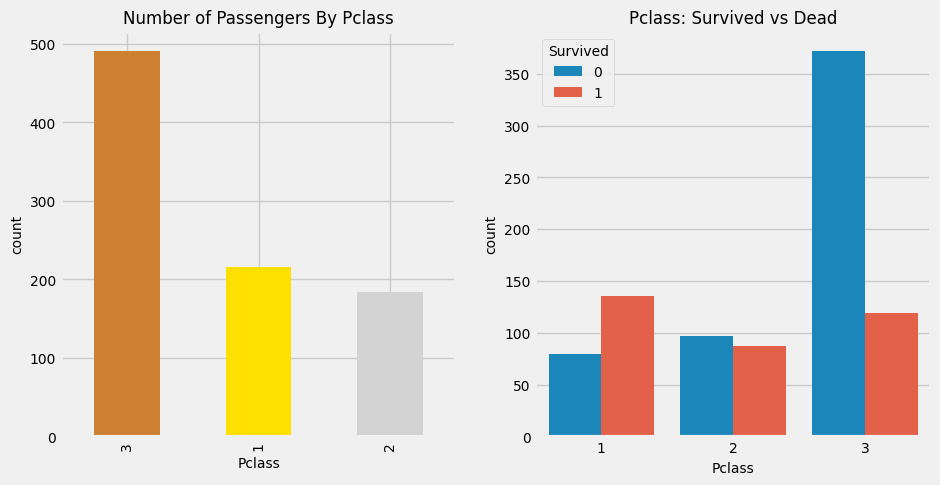

In [57]:
# Pclass - Survived 분석 시각화
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

train_data["Pclass"].value_counts().plot.bar(color = ['#CD7F32', '#FFDF00', '#D3D3D3'], ax = axes[0])
axes[0].set_title("Number of Passengers By Pclass", size = 12)
axes[0].set_ylabel("count")

sns.countplot(x = "Pclass", data = train_data, hue = "Survived", ax = axes[1])
axes[1].set_title("Pclass: Survived vs Dead", size = 12)

plt.rc("font", size=10)
plt.rc("axes", labelsize = 10)
plt.show()

In [58]:
# Sex와 생존여부 분석
train_data.groupby(["Sex", "Survived"])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

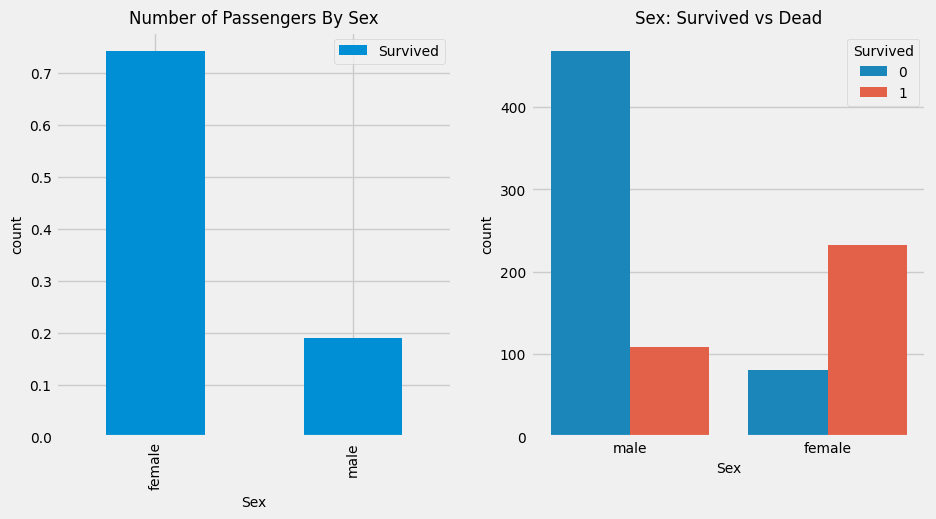

In [59]:
# Sex - Survived 분석 시각화
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

train_data[["Sex", "Survived"]].groupby(["Sex"]).mean().plot.bar(ax = axes[0])
axes[0].set_title("Number of Passengers By Sex", size = 12)
axes[0].set_ylabel("count")

sns.countplot(x = "Sex", hue = "Survived", data = train_data, ax = axes[1])
axes[1].set_title("Sex: Survived vs Dead", size = 12)

plt.rc("font", size=10)
plt.rc("axes", labelsize = 10)
plt.show()

In [60]:
# Sex, Pclass와 생존여부 분석
pd.crosstab([train_data.Sex, train_data.Survived], train_data.Pclass, margins = True).style.background_gradient(cmap = "summer_r")

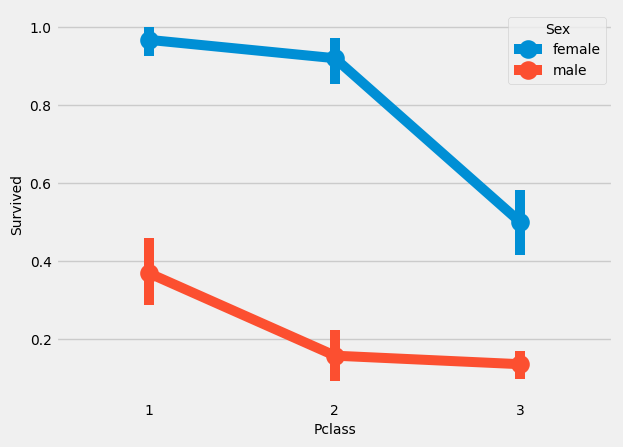

In [61]:
# Sex, Pclass - Survived 분석 시각화
sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_data, markersize = 8)
plt.show()

- 여성이 남성에 비해 생존할 확률이 높음
- 1등석 여성은 거의 모두 생존했으며, 3등석 남성은 많은 수의 사망자가 발생

In [62]:
# 승객들의 Age
print("Oldest Passenger was of:", train_data["Age"].max(), "Years")
print("Youngest Passenger was of:", train_data["Age"].min(), "Years")
print("Average Age on the titanic:", round(train_data["Age"].mean(), 2), "Years")

Oldest Passenger was of: 80.0 Years
Youngest Passenger was of: 0.42 Years
Average Age on the titanic: 29.7 Years


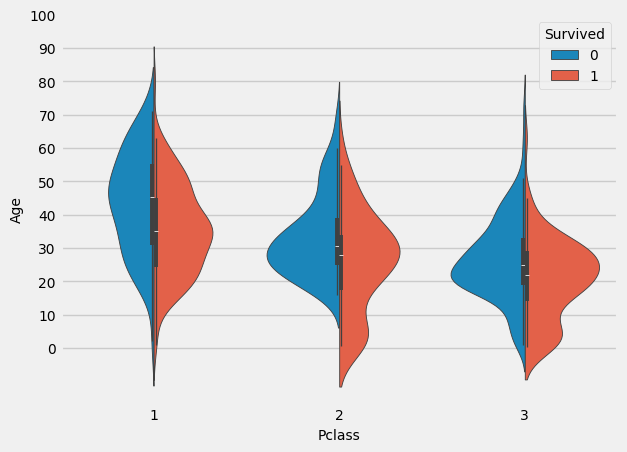

In [63]:
# Pclass, Age - Survived 분석 시각화
sns.violinplot(x = "Pclass", y = "Age", hue = "Survived", data = train_data, split = True)

plt.yticks(range(0, 110, 10))
plt.show()

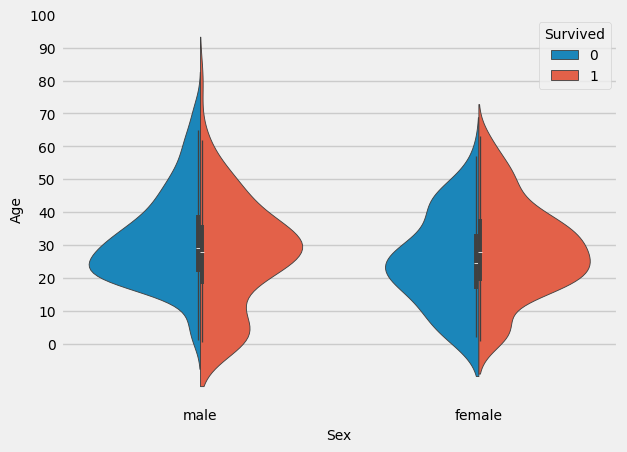

In [64]:
# Sex, Age - Survived 분석 시각화
sns.violinplot(x = "Sex", y = "Age", hue = "Survived", data = train_data, split = True)

plt.yticks(range(0, 110, 10))
plt.show()

- 10살 미만의 아이들은 Pclass에 관계없이 생존률이 높다.


In [65]:
# Name에서 호칭 추출
train_data["Initial"] = 0

for idx in train_data:
    train_data["Initial"] = train_data.Name.str.extract("([A-Za-z]+)\.")

In [66]:
# 호칭별 성별 확인
pd.crosstab(train_data.Initial, train_data.Sex).T.style.background_gradient(cmap = 'summer_r')

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [67]:
# 호칭 정리
train_data["Initial"].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                              ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                              inplace=True)

In [68]:
# 호칭별 평균 나이 확인
train_data.groupby("Initial")["Age"].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

- Master: 5
- Miss: 22
- Mr: 33
- Mrs: 36
- Other: 46

In [69]:
# Age 결측치 제거
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == "Master"), "Age"] = 5
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == "Miss"), "Age"] = 22
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == "Mr"), "Age"] = 33
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == "Mrs"), "Age"] = 36
train_data.loc[(train_data.Age.isnull()) & (train_data.Initial == "Other"), "Age"] = 46

In [70]:
# 결측치가 제거되었는지 확인
train_data.Age.isnull().any()

False

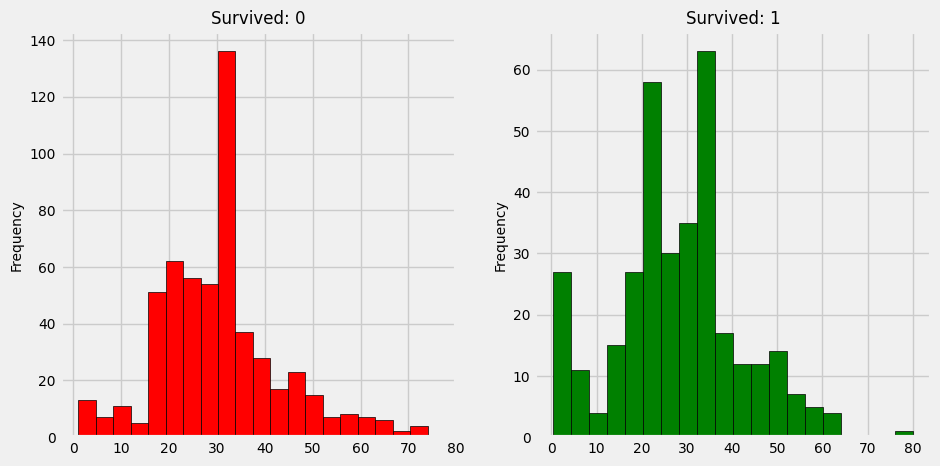

In [71]:
# Survived 별로 나이 분포 확인
fig, axes = plt.subplots(1, 2, figsize = (10, 5))

train_data[train_data["Survived"] == 0].Age.plot.hist(ax = axes[0], bins = 20, edgecolor = "black", color = "red")
axes[0].set_title("Survived: 0", size = 12)
axes[0].set_xticks(list(range(0, 85, 10)))

train_data[train_data["Survived"] == 1].Age.plot.hist(ax = axes[1], bins = 20, edgecolor = "black", color = "green")
axes[1].set_title("Survived: 1", size = 12)
axes[1].set_xticks(list(range(0, 85, 10)))

plt.show()

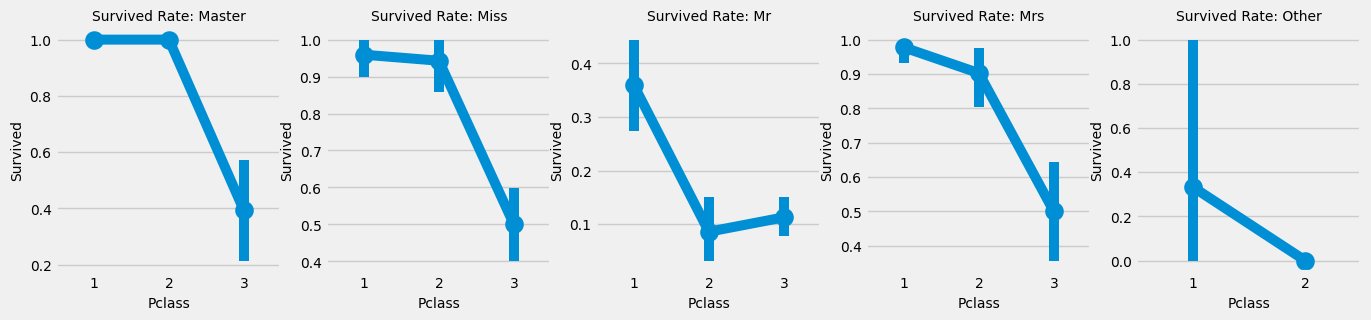

In [72]:
# Initial, Pclass - Survived 분석 시각화
fig, axes = plt.subplots(1, 5, figsize = (15, 3))

sns.pointplot(x = "Pclass", y = "Survived", data = train_data[train_data["Initial"] == "Master"], markersize = 8, ax = axes[0])
axes[0].set_title("Survived Rate: Master", size = 10)

sns.pointplot(x = "Pclass", y = "Survived", data = train_data[train_data["Initial"] == "Miss"], markersize = 8, ax = axes[1])
axes[1].set_title("Survived Rate: Miss", size = 10)

sns.pointplot(x = "Pclass", y = "Survived", data = train_data[train_data["Initial"] == "Mr"], markersize = 8, ax = axes[2])
axes[2].set_title("Survived Rate: Mr", size = 10)

sns.pointplot(x = "Pclass", y = "Survived", data = train_data[train_data["Initial"] == "Mrs"], markersize = 8, ax = axes[3])
axes[3].set_title("Survived Rate: Mrs", size = 10)

sns.pointplot(x = "Pclass", y = "Survived", data = train_data[train_data["Initial"] == "Other"], markersize = 8, ax = axes[4])
axes[4].set_title("Survived Rate: Other", size = 10)

plt.show()

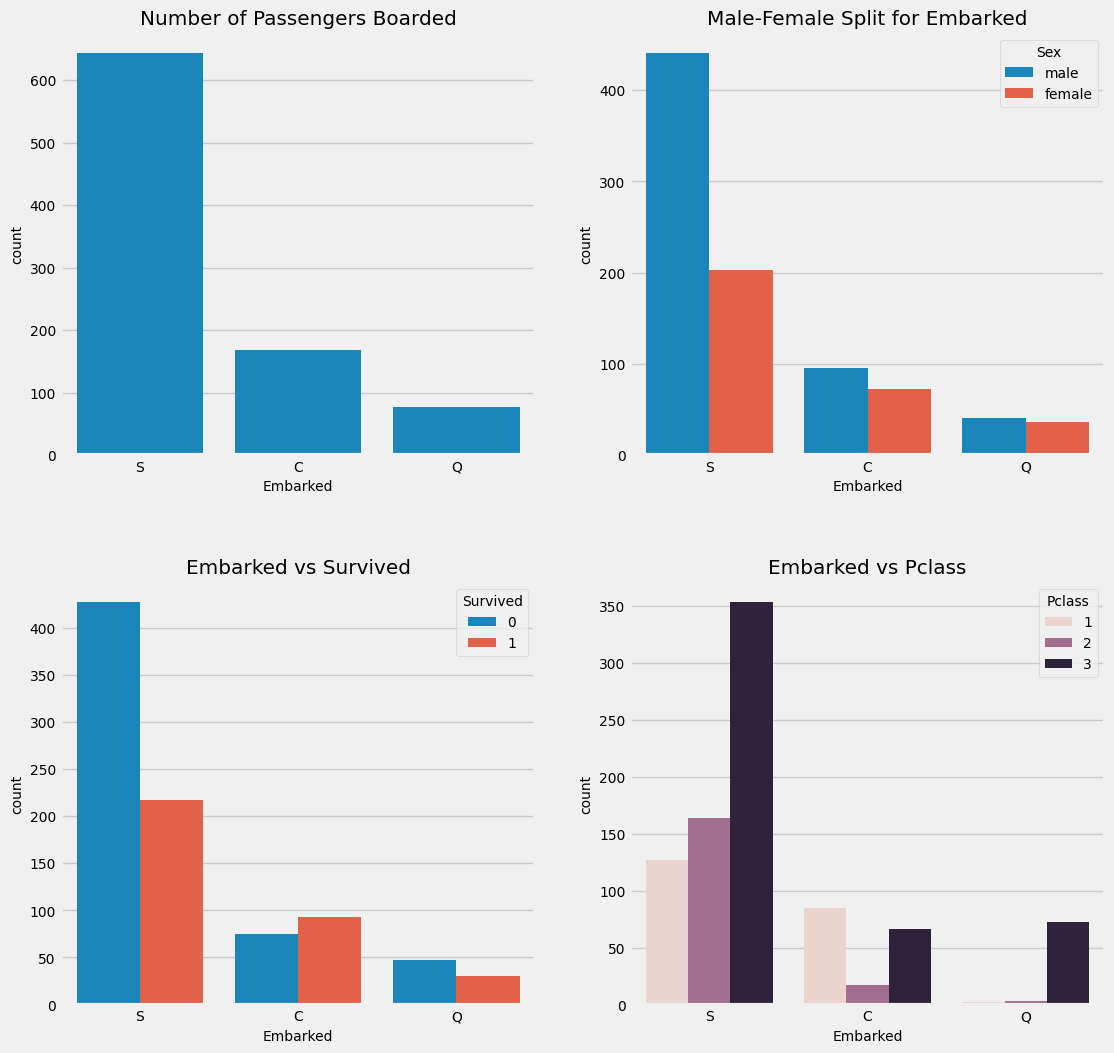

In [73]:
# Embarked와 생존여부 분석
fig, axes = plt.subplots(2, 2, figsize = (12, 12))

sns.countplot(x = "Embarked", data = train_data, ax = axes[0, 0])
axes[0, 0].set_title("Number of Passengers Boarded")

sns.countplot(x = "Embarked", hue = "Sex", data = train_data, ax = axes[0, 1])
axes[0, 1].set_title("Male-Female Split for Embarked")

sns.countplot(x = "Embarked", hue = "Survived", data = train_data, ax = axes[1, 0])
axes[1, 0].set_title("Embarked vs Survived")

sns.countplot(x = "Embarked", hue = "Pclass", data = train_data, ax = axes[1, 1])
axes[1, 1].set_title("Embarked vs Pclass")

plt.subplots_adjust(wspace = 0.2, hspace = 0.3)
plt.show()

- S (Southampton)에서 1, 2등석 승객 대부분이 탑승하였으며, 해당 탑승지에서 탑승한 승객의 생존율이 가장 높다.
- 3등석 승객이 많이 탑승한 S, Q에서는 사망자가 생존자보다 많이 발생했다.

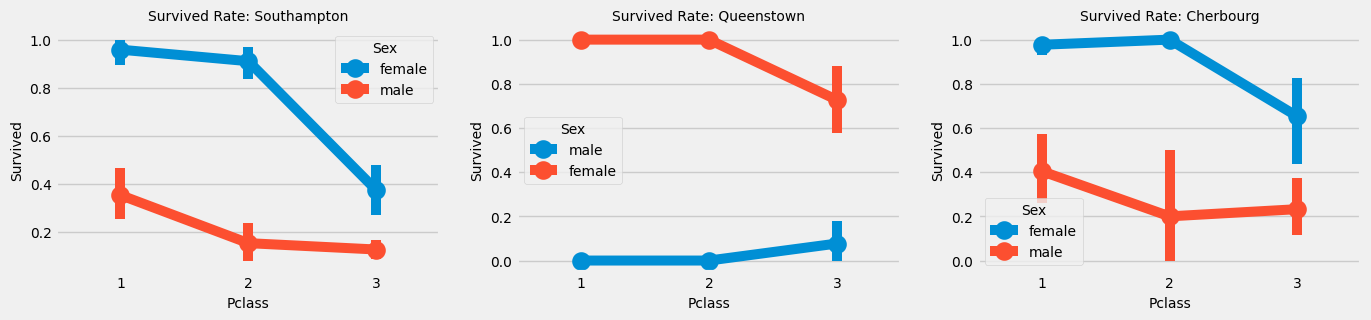

In [74]:
# Embarked, Pclass - Survived 분석 시각화
fig, axes = plt.subplots(1, 3, figsize = (15, 3))

sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_data[train_data["Embarked"] == "S"], markersize = 8, ax = axes[0])
axes[0].set_title("Survived Rate: Southampton", size = 10)

sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_data[train_data["Embarked"] == "Q"], markersize = 8, ax = axes[1])
axes[1].set_title("Survived Rate: Queenstown", size = 10)

sns.pointplot(x = "Pclass", y = "Survived", hue = "Sex", data = train_data[train_data["Embarked"] == "C"], markersize = 8, ax = axes[2])
axes[2].set_title("Survived Rate: Cherbourg", size = 10)


plt.subplots_adjust(wspace = 0.2)
plt.show()

In [75]:
# Embarked 결측치 제거
# 대부분의 승객이 Southampton에서 탑승하였으므로 Embarked의 결측치는 'S'로 채운다.
train_data["Embarked"].fillna('S', inplace = True)

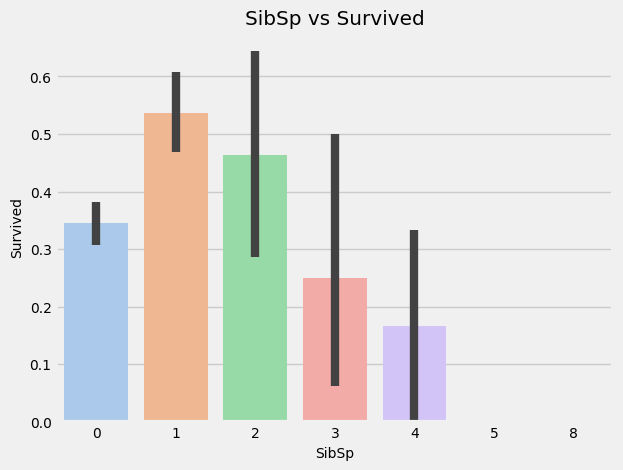

In [76]:
# Sibsp - Survived 분석 시각화
sns.barplot(x = "SibSp", y = "Survived", data = train_data, palette = "pastel")

plt.title("SibSp vs Survived")
plt.show()

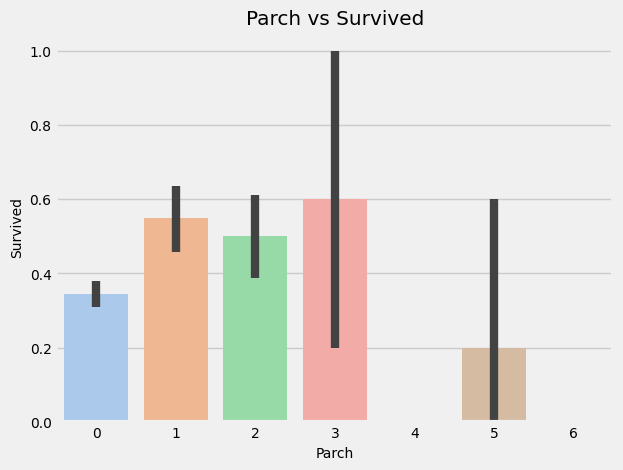

In [77]:
# Parch - Survived 분석 시각화
sns.barplot(x = "Parch", y = "Survived", data = train_data, palette = "pastel")

plt.title("Parch vs Survived")
plt.show()

테스트 데이터셋 정리

In [78]:
# Name에서 호칭 추출
test_data["Initial"] = 0

for idx in train_data:
    test_data["Initial"] = test_data.Name.str.extract("([A-Za-z]+)\.")

In [79]:
# 호칭 정리
test_data["Initial"].replace(['Mlle', 'Mme', 'Ms', 'Dr', 'Major', 'Lady', 'Countess', 'Jonkheer', 'Col', 'Rev', 'Capt', 'Sir', 'Don'],
                             ['Miss', 'Miss', 'Miss', 'Mr', 'Mr', 'Mrs', 'Mrs', 'Other', 'Other', 'Other', 'Mr', 'Mr', 'Mr'],
                             inplace=True)

In [80]:
# Age 결측치 제거
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == "Master"), "Age"] = 5
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == "Miss"), "Age"] = 22
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == "Mr"), "Age"] = 33
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == "Mrs"), "Age"] = 36
test_data.loc[(test_data.Age.isnull()) & (test_data.Initial == "Other"), "Age"] = 46

In [81]:
# Embarked 결측치 제거
# 대부분의 승객이 Southampton에서 탑승하였으므로 Embarked의 결측치는 'S'로 채운다.
test_data["Embarked"].fillna('S', inplace = True)

In [82]:
# 탑승지별 요금 평균 확인
test_data.groupby("Embarked")["Fare"].mean()

Embarked
C    66.259765
Q    10.957700
S    28.230436
Name: Fare, dtype: float64

In [83]:
# Fare 결측치 제거
test_data.loc[(test_data.Fare.isnull()) & (test_data.Embarked == "S"), "Fare"] = 28.230436
test_data.loc[(test_data.Fare.isnull()) & (test_data.Embarked == "C"), "Fare"] = 66.259765
test_data.loc[(test_data.Fare.isnull()) & (test_data.Embarked == "Q"), "Fare"] = 10.957700

In [84]:
# 결측치가 제거되었는지 확인
test_data.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Initial     0
dtype: int64

ML - Classification

In [85]:
# 불필요한 컬럼 제거
train_data.drop(["Name", "Initial"], axis = 1, inplace = True)
test_data.drop(["Name", "Initial"], axis = 1, inplace = True)

In [86]:
# 학습 데이터 확인
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [87]:
# 테스트 데이터 확인
test_data.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [89]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

encoder.fit(train_data["Sex"])
train_data["Sex"] = encoder.transform(train_data["Sex"])
test_data["Sex"] = encoder.transform(test_data["Sex"])

encoder.fit(train_data["Embarked"])
train_data["Embarked"] = encoder.transform(train_data["Embarked"])
test_data["Embarked"] = encoder.transform(test_data["Embarked"])

In [91]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [95]:
# 학습, 검증 데이터셋 분리
from sklearn.model_selection import train_test_split

features = train_data.drop(["Survived"], axis = 1)
label = train_data["Survived"]

features_train, features_valid, label_train, label_valid = train_test_split(features,
                                                                            label,
                                                                            test_size = 0.25,
                                                                            shuffle = True,
                                                                            stratify = label,
                                                                            random_state = 2023)

startify = 컬럼 (컬럼의 비율에 맞게 트레인셋과 테스트셋의 비율 고정)

total: 0 - 70%, 1 - 30% <br>
train: 0 - 70%, 1 - 30% <br>
valid: 0 - 70%, 1 - 30%

In [97]:
# 학습, 검증 데이터셋 & 레이블 개수 확인
print("shape of features:", features.shape)
print("shape of labels:", label.shape)
print("shape of features_train:", features_train.shape)
print("shape of features_valid:", features_valid.shape)
print("shape of label_train:", label_train.shape)
print("shape of label_valid:", label_valid.shape)

shape of features: (891, 7)
shape of labels: (891,)
shape of features_train: (668, 7)
shape of features_valid: (223, 7)
shape of label_train: (668,)
shape of label_valid: (223,)


In [146]:
# ML 모델 정의
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 200,
                               oob_score = True,
                               criterion = "entropy",
                               random_state = 2023)
model.fit(features_train, label_train)

predicted_RF = model.predict(features_valid)

In [147]:
# ML 모델 정의
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(random_state = 2023)
model.fit(features_train, label_train)

predicted_LR = model.predict(features_valid)

In [148]:
# 모델 정의
from lightgbm import LGBMClassifier

model = LGBMClassifier(random_state = 2023)
model.fit(features_train, label_train)

predicted_LGBM = model.predict(features_valid)

[LightGBM] [Info] Number of positive: 256, number of negative: 412
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000095 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 200
[LightGBM] [Info] Number of data points in the train set: 668, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.383234 -> initscore=-0.475846
[LightGBM] [Info] Start training from score -0.475846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

In [149]:
# 모델 정의
from xgboost import XGBClassifier

model = XGBClassifier(random_state = 2023)
model.fit(features_train, label_train)

predicted_XGB = model.predict(features_valid)

- Accuracy (정확도): 전체 데이터 중에서 몇 개나 맞췄는가
- Precision (정밀도): 모델이 True라고 분류한 것 중에서 실제로 True인게 몇 개나 있는가
- Recall (재현율): 실제 True인 것 중에서 모델이 True라고 예측한 것은 몇 개나 있는가
- F1-score: 정밀도와 재현율의 조화평균

In [144]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

predicted = model.predict(features_valid)

accuracy = accuracy_score(label_valid, predicted)
precision = precision_score(label_valid, predicted)
recall = recall_score(label_valid, predicted)
f1 = f1_score(label_valid, predicted)

In [145]:
print("accuracy of model:", accuracy)
print("precision of model:", precision)
print("recall of model:", recall)
print("f1 of model:", f1)

accuracy of model: 0.7488789237668162
precision of model: 0.7027027027027027
recall of model: 0.6046511627906976
f1 of model: 0.6499999999999999


In [134]:
from sklearn.metrics import confusion_matrix

cf_matrix = confusion_matrix(label_valid, predicted)
cf_matrix

array([[108,  29],
       [ 27,  59]], dtype=int64)

In [135]:
calculated_acc = (113 + 57) / (113 + 57 + 29 + 24)
calculated_precision = 57 / (24 + 57)
calculated_recall = 57 / (29 + 57)
calculated_f1 = 2 * (calculated_precision * calculated_recall) / (calculated_precision + calculated_recall)

In [136]:
print("calculated accuracy of model:", calculated_acc)
print("calculated precision of model:", calculated_precision)
print("calculated recall of model:", calculated_recall)
print("calculated f1 of model:", calculated_f1)

calculated accuracy of model: 0.7623318385650224
calculated precision of model: 0.7037037037037037
calculated recall of model: 0.6627906976744186
calculated f1 of model: 0.6826347305389222


In [137]:
import itertools
import numpy as np
import matplotlib.pyplot as plt

# 모델 성능 시각화 함수 (혼동행렬 시각화)
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation = 90)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.grid(False)
    plt.show()

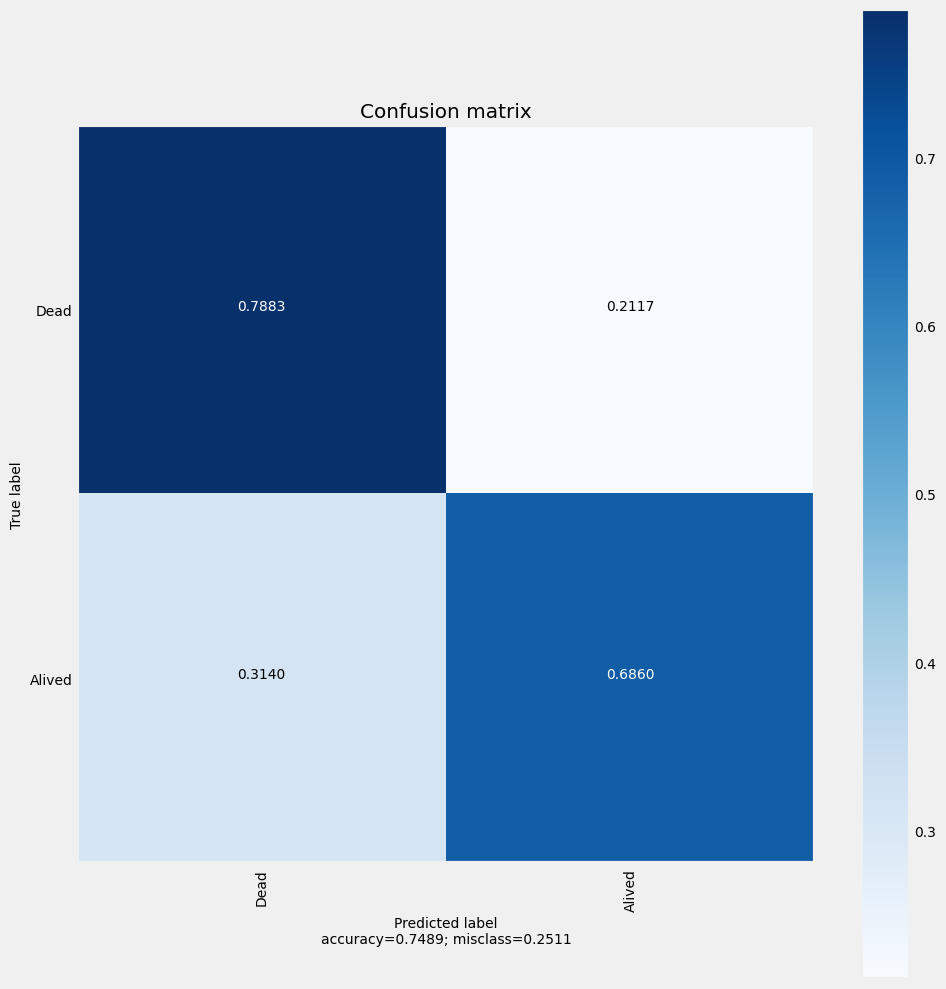

In [139]:
plot_confusion_matrix(cf_matrix, target_names = ["Dead", "Alived"])

앙상블

In [167]:
predicted_total = (predicted_RF + predicted_LR + predicted_LGBM + predicted_XGB) // 4
predicted_total

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1], dtype=int64)

모델 4개를 가지고 예측을 할 때, 모델 예측의 과반수에 따라 예측 결정

80, 81, 83, 84

In [168]:
accuracy = accuracy_score(label_valid, predicted_total)
precision = precision_score(label_valid, predicted_total)
recall = recall_score(label_valid, predicted_total)
f1 = f1_score(label_valid, predicted_total)

In [169]:
print("accuracy of model:", accuracy)
print("precision of model:", precision)
print("recall of model:", recall)
print("f1 of model:", f1)

accuracy of model: 0.7892376681614349
precision of model: 0.8421052631578947
recall of model: 0.5581395348837209
f1 of model: 0.6713286713286712


크롤링